In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
store_data= pd.read_csv("C:/Users/catch/Downloads/stores_data_set.csv")
feature_data= pd.read_csv("C:/Users/catch/Downloads/Features_data_set.csv")
sales_data= pd.read_csv("C:/Users/catch/Downloads/sales_data_set.csv")

In [6]:
df=pd.merge(sales_data,store_data,on='Store')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,B,118221
421566,45,98,05/10/2012,628.10,False,B,118221
421567,45,98,12/10/2012,1061.02,False,B,118221
421568,45,98,19/10/2012,760.01,False,B,118221


In [7]:
di=pd.merge(df,feature_data,on=['Store', 'Date'],how='inner')
di.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
di.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday_x          2
Type                 3
Size                40
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
IsHoliday_y          2
dtype: int64

In [9]:
di.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [10]:
cat_col=['Store',"Dept","Type","Size","IsHoliday"]
continuous_col=['Temperature','Fuel_Price','CPI','Unemployment',"Weekly_Sales","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]
df_numeric=di.select_dtypes(include=np.number)

In [11]:
di.drop(['IsHoliday_x'],axis=1,inplace=True)
di.rename(columns={'IsHoliday_y':'IsHoliday'},inplace=True)

In [12]:
di.fillna(0,inplace=True)

In [13]:
di.Date=pd.to_datetime(di.Date, format="%d/%m/%Y")
di["day"]=di.Date.dt.day
di["month"]=di.Date.dt.month
di["year"]=di.Date.dt.year

di["Week"]=di.Date.dt.strftime("%U")
di["Week"]

0         05
1         06
2         07
3         08
4         09
          ..
421565    39
421566    40
421567    41
421568    42
421569    43
Name: Week, Length: 421570, dtype: object

In [14]:
di.drop(columns=("Date"),inplace=True)

In [15]:
di.head(2)

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,day,month,year,Week
0,1,1,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,2,2010,05
1,1,1,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,12,2,2010,06


Outliers


In [16]:
def plot(df,col):
  fig,ax=plt.subplots(1,2)
  sns.distplot(df[col],ax=ax[0])
  sns.boxplot(df[col],ax=ax[1])
  plt.show()

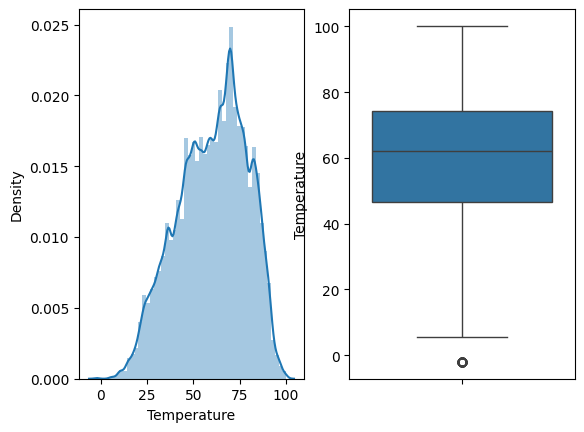

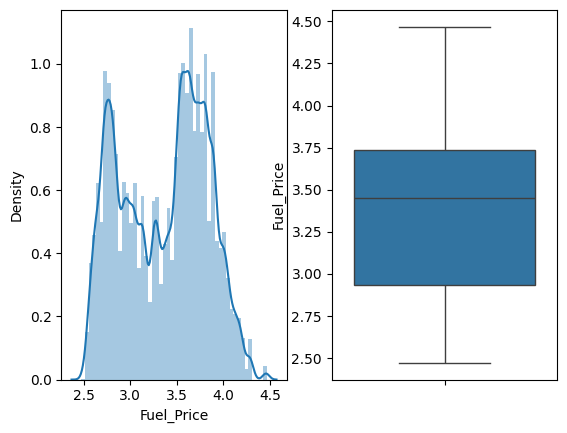

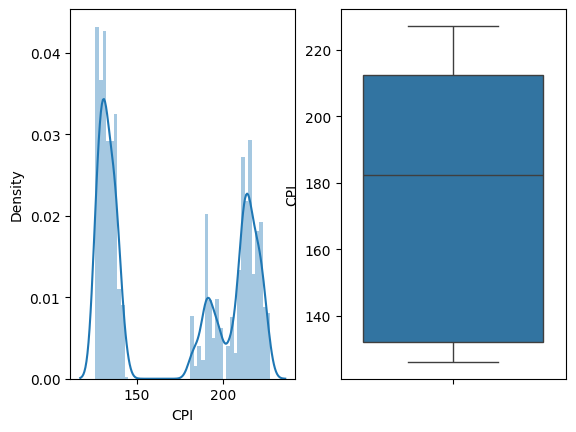

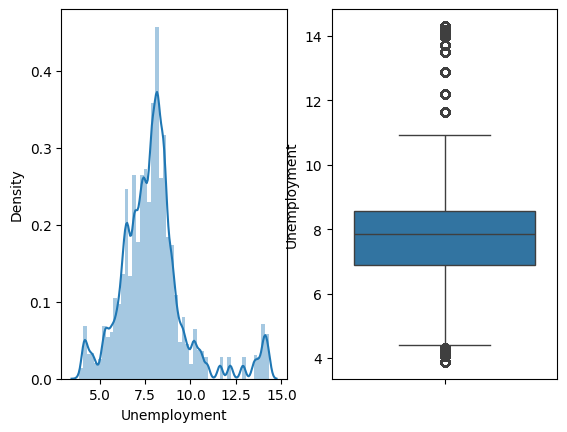

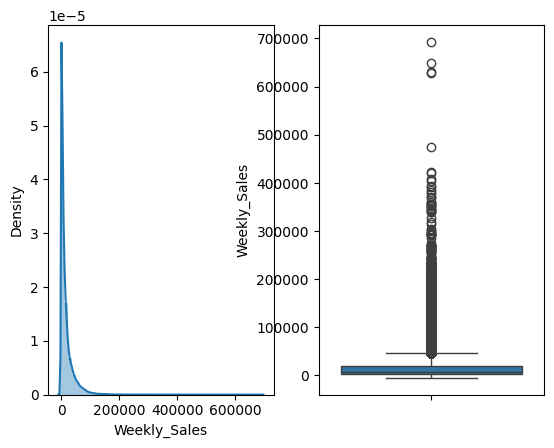

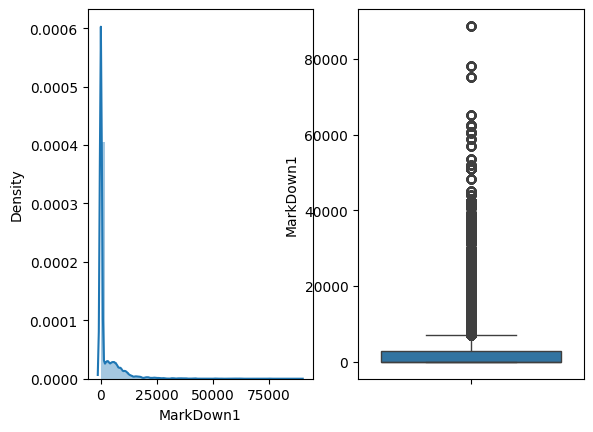

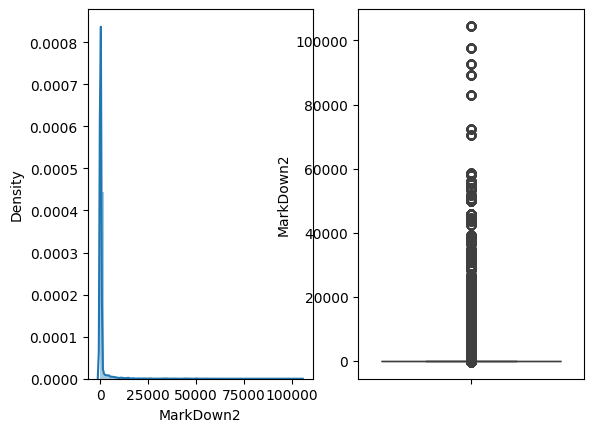

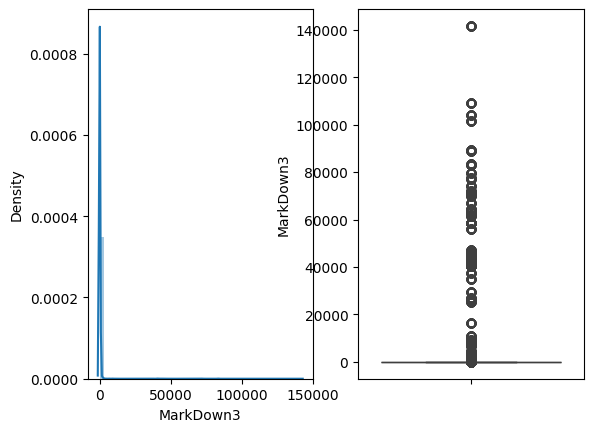

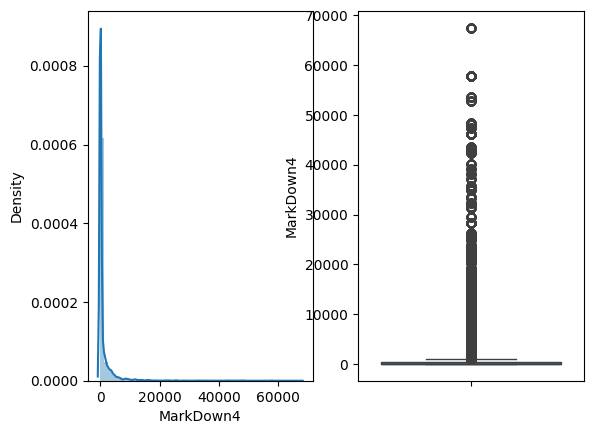

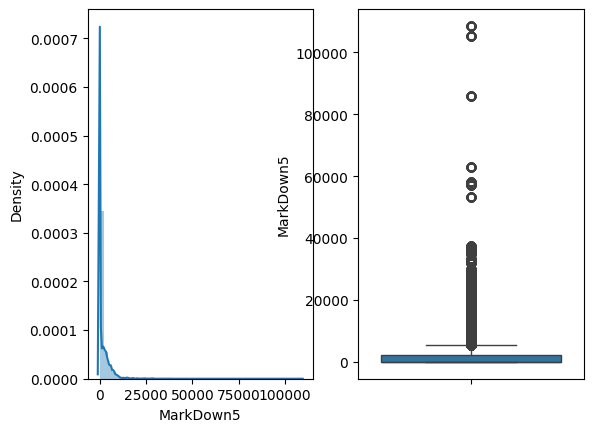

In [17]:
for features in continuous_col:
  plot(di,features)

In [18]:
def iqr(df,col):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  upper_limit=q3+1.5*iqr
  lower_limit=q1-1.5*iqr
  return upper_limit,lower_limit

In [19]:
for i in continuous_col:
  upper_limit,lower_limit=iqr(di,i)
  print(i,"upper_limit:",upper_limit,"& lower_limit:",lower_limit)

Temperature upper_limit: 115.68 & lower_limit: 5.279999999999994
Fuel_Price upper_limit: 4.9455 & lower_limit: 1.7254999999999996
CPI upper_limit: 333.00848195000003 & lower_limit: 11.431177550000001
Unemployment upper_limit: 11.093499999999999 & lower_limit: 4.369500000000001
Weekly_Sales upper_limit: 47395.15625 & lower_limit: -25109.653749999998
MarkDown1 upper_limit: 7022.625000000001 & lower_limit: -4213.575000000001
MarkDown2 upper_limit: 5.5 & lower_limit: -3.3000000000000003
MarkDown3 upper_limit: 11.350000000000001 & lower_limit: -6.8100000000000005
MarkDown4 upper_limit: 1063.2250000000001 & lower_limit: -637.9350000000001
MarkDown5 upper_limit: 5420.1 & lower_limit: -3252.06


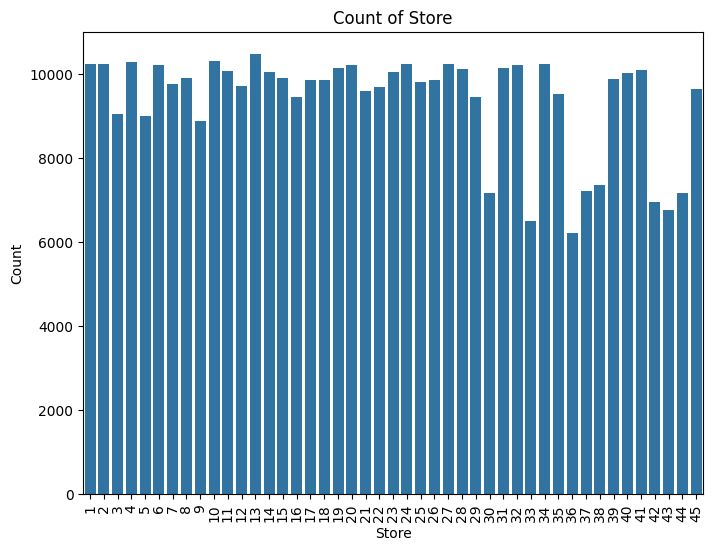

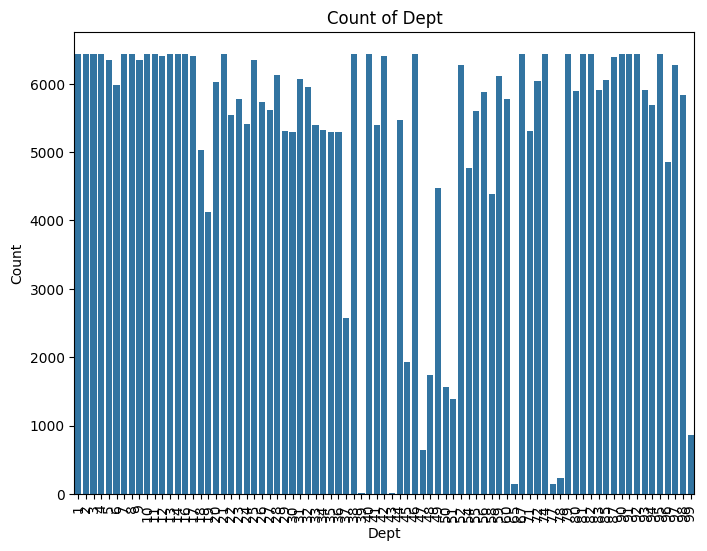

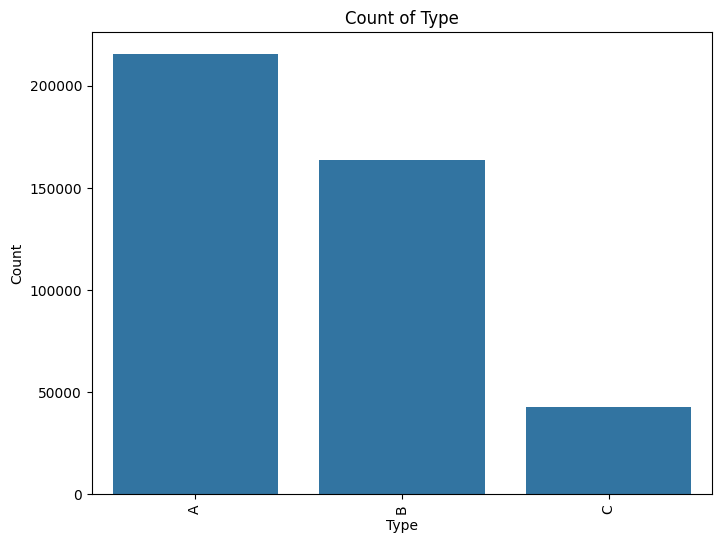

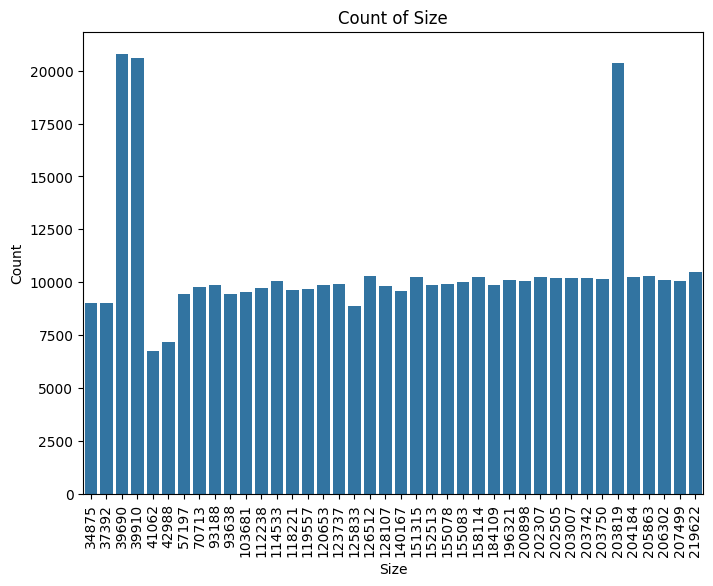

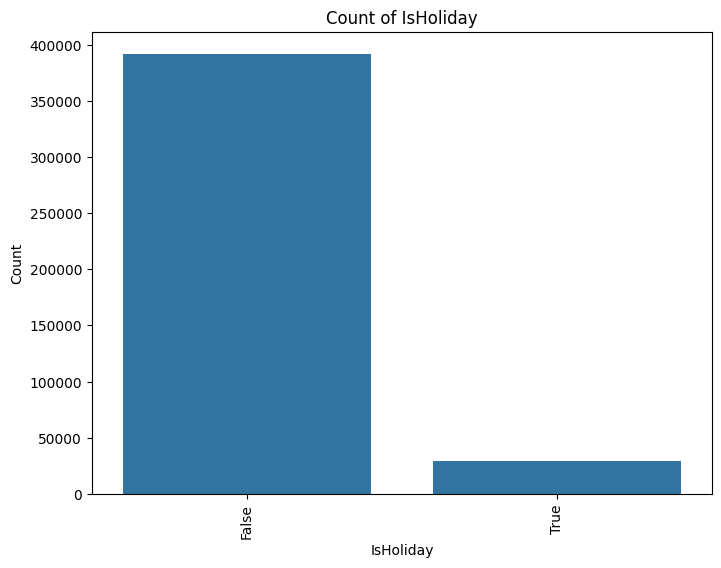

In [20]:
for feature in cat_col:

  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, data=di)
  plt.title(f'Count of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [22]:
df=di.copy()

In [23]:
le=LabelEncoder()
for i in df.columns:
  df[i]=le.fit_transform(df[i])
  df.head()

In [46]:
x=df.drop(['Weekly_Sales','Week','day'],axis=1)
y=df['Weekly_Sales']

In [47]:
# Import the necessary module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
print(x.shape)
print(y.shape)

(421570, 18)
(421570,)


In [27]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test
print(mean_squared_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))

10840366487.77724
0.08773788052650544


In [44]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor().fit(x_train,y_train)
y_pred_train = RF_model.predict(x_train)
y_pred_test = RF_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.994938091405932, 0.9641480307163891)

In [48]:
from xgboost import XGBRegressor
XGB_model=XGBRegressor().fit(x_train,y_train)
y_pred_train = XGB_model.predict(x_train)
y_pred_test = XGB_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.9602906757594911, 0.9541359702712554)

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
GB_model=GradientBoostingRegressor().fit(x_train,y_train)
y_pred_train = GB_model.predict(x_train)
y_pred_test = GB_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.7335804215209314, 0.7320605309601408)

In [33]:
import pickle

In [34]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

with open('sales_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [37]:
df.head(1)

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,day,month,year,Week
0,0,0,274802,0,21,800,15,0,18,4,0,0,1003,216,0,4,1,0,4


In [45]:
x

,Store,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,0,0,0,21,800,15,0,18,4,0,0,1003,216,0
1,0,0,0,21,647,9,0,18,4,0,0,1022,216,1
2,0,0,0,21,697,2,0,18,4,0,0,1027,216,0
3,0,0,0,21,1009,11,0,18,4,0,0,1029,216,0
4,0,0,0,21,1001,42,0,18,4,0,0,1033,216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,44,79,1,13,2024,814,1056,207,93,1027,1190,624,276,0
421566,44,79,1,13,2025,807,1148,18,628,1219,843,627,275,0
421567,44,79,1,13,1412,815,612,18,387,564,1426,631,275,0
421568,44,79,1,13,1512,801,616,18,184,443,489,632,275,0


In [41]:
# Load the model from the pickle file
with open("C:/Users/catch/OneDrive/Desktop/demo/sales_model.pkl", 'rb') as f:
    model = pickle.load(f)

# Make predictions using the loaded model
dinesh=np.array([[0,0,0,21,800,15,0,18,4,0,0,1003,216,0,4,1,0,4]])
# dinesh=dinesh.reshape(1, -1)
y_pred = model.predict(dinesh)
print(y_pred)

[286557.11]
